In [27]:
#LIBRARIES 
import pandas as pd
import numpy as np
import re
from datetime import datetime
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
print(nx.__version__)
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms.approximation.dominating_set import min_weighted_dominating_set, min_edge_dominating_set
from nltk.corpus import stopwords
import nltk
#import import_ipynb
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop =stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

2.4


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [28]:
df=pd.read_csv('C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/Preprocessed_dataset.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663685 entries, 0 to 663684
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Screen_name  663685 non-null  object
 1   Retweet      663685 non-null  object
 2   Name         663666 non-null  object
 3   Text_clean   663685 non-null  object
 4   Day          663685 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 25.3+ MB


In [30]:
helper = df.value_counts(['Screen_name','Retweet']).to_frame('Tot connection user1,user2').reset_index()
helper['key'] = helper['Screen_name'] + helper['Retweet']
df['key'] = df['Screen_name'] + df['Retweet']
df = pd.merge(df, helper, how="left", on=['key','key'])
df = df.drop(['key','Screen_name_y','Retweet_y','Name'], axis=1)
df = df.rename(columns={'Screen_name_x':'Screen_name','Retweet_x':'Retweet'})
df =  df.loc[df['Tot connection user1,user2']>=2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82402 entries, 11 to 663684
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Screen_name                 82402 non-null  object
 1   Retweet                     82402 non-null  object
 2   Text_clean                  82402 non-null  object
 3   Day                         82402 non-null  int64 
 4   Tot connection user1,user2  82402 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


GRAPH BUILDING

Length of the datast 1055
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  775 non-null    object
 1   connessioni  775 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.2+ KB
Info dataset None
Length of the filtered dataset 775
Number of useres deleted280.0
Start run 23:17:18.457547
Finish script 23:17:21.772569


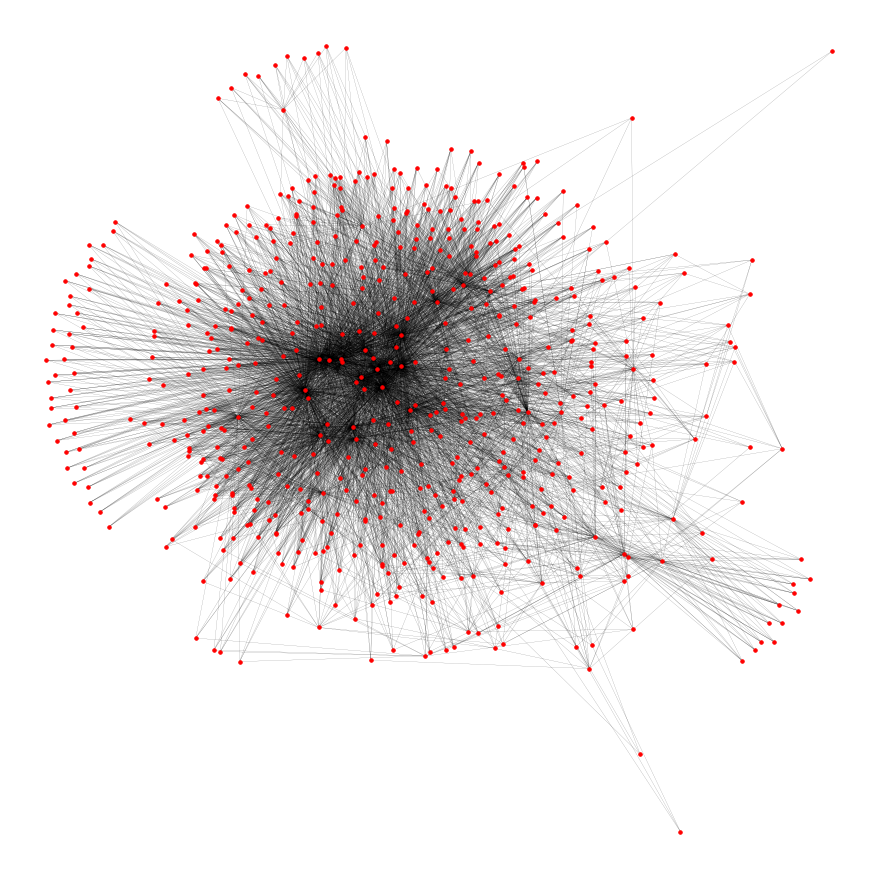

In [31]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov1 = df.loc[df['Day'] == 1]
Start_length = str(len(df_Nov1))
print('Length of the datast ' + Start_length)
#RESET INDEX
df_Nov1 = df_Nov1.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov1, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov1_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov1_retweet_leaderboard = Nov1_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov1_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov1_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted" + str(float(Start_length) - float(Filtereddataset_length)))
Nov1_retweet_leaderboard_filterbyconnections = Nov1_retweet_leaderboard[['Screen_name']]
#convert in list
Nov1_retweet_leaderboard_filterbyconnections = Nov1_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
df_Nov1 = df_Nov1[df_Nov1['Screen_name'].isin(Nov1_retweet_leaderboard_filterbyconnections)]
Graph_building_1Nov = df_Nov1[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(3,figsize=(12,12)) 
G_1Nov = nx.Graph()
for r in Graph_building_1Nov.iterrows():
    for user in r[1]['Retweet']:
        G_1Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_1Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)
print("Finish script " + str(datetime.now().time()))

In [32]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_1Nov))
density_G_1Nov = nx.density(G_1Nov)
print("Network density", density_G_1Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_1Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_1Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_1Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 651
Number of edges: 5648
Average degree:  17.3518
Network density 0.026695025404702824
Nel grafo di Biden 1K del NOV vi sono 5648 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 63


Length of the datast 4853
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  2647 non-null   object
 1   connessioni  2647 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB
Info dataset None
Length of the filtered dataset 2647
Number of useres deleted 2206.0
Start run 23:17:22.203838
Finish script 23:17:44.993230


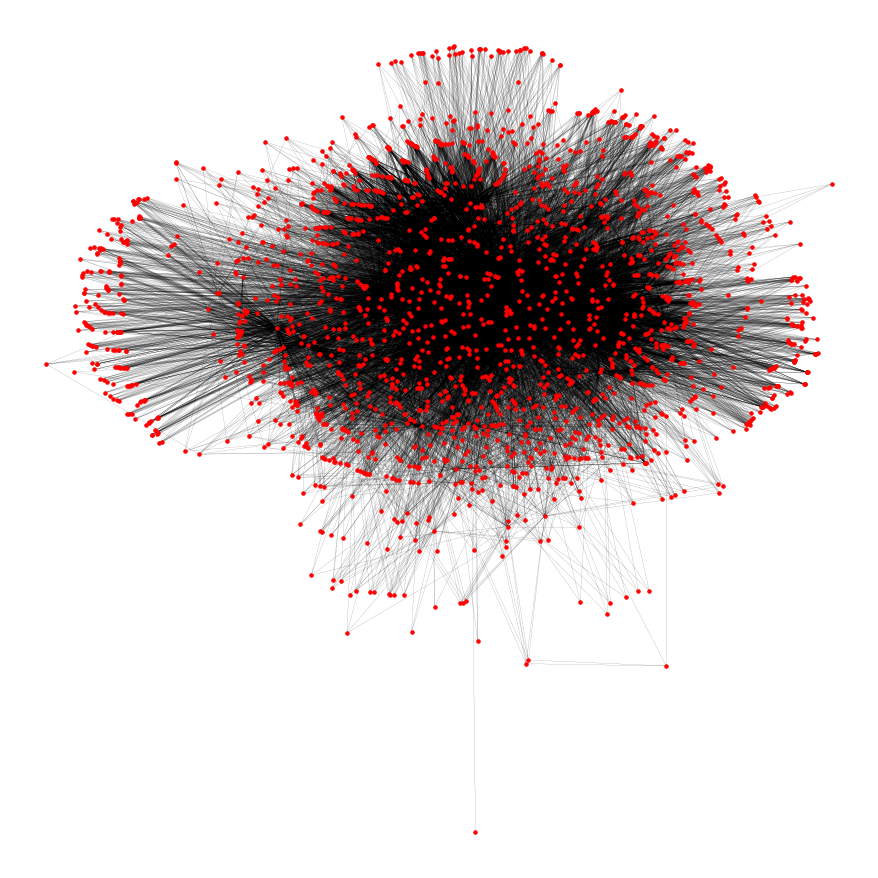

In [33]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov2 = df.loc[df['Day'] == 2]
#DELETE TWEETS WITHOUT RETWEET
df_Nov2 = df_Nov2[df_Nov2['Retweet'].notna()]
Start_length = str(len(df_Nov2))
print('Length of the datast ' + Start_length)
#RESET INDEX
df_Nov2 = df_Nov2.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov2, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov2_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov2_retweet_leaderboard = Nov2_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov2_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov2_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov2_retweet_leaderboard_filterbyconnections = Nov2_retweet_leaderboard[['Screen_name']]
#convert in list
Nov2_retweet_leaderboard_filterbyconnections = Nov2_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 2 CONNECTION
df_Nov2 = df_Nov2[df_Nov2['Screen_name'].isin(Nov2_retweet_leaderboard_filterbyconnections)]
Graph_building_2Nov = df_Nov2[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(3,figsize=(12,12)) 
G_2Nov = nx.Graph()
for r in Graph_building_2Nov.iterrows():
    for user in r[1]['Retweet']:
        G_2Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_2Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [34]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_2Nov))
density_G_2Nov = nx.density(G_2Nov)
print("Network density", density_G_2Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_2Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_2Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_2Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 2307
Number of edges: 21980
Average degree:  19.0550
Network density 0.008263247982778759
Nel grafo di Biden 1K del NOV vi sono 21980 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 62


Length of the dataset 8791
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  5103 non-null   object
 1   connessioni  5103 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.9+ KB
Info dataset None
Length of the filtered dataset 5103
Number of useres deleted 3688.0
Start run 23:17:45.792683
Finish script 23:18:55.560903


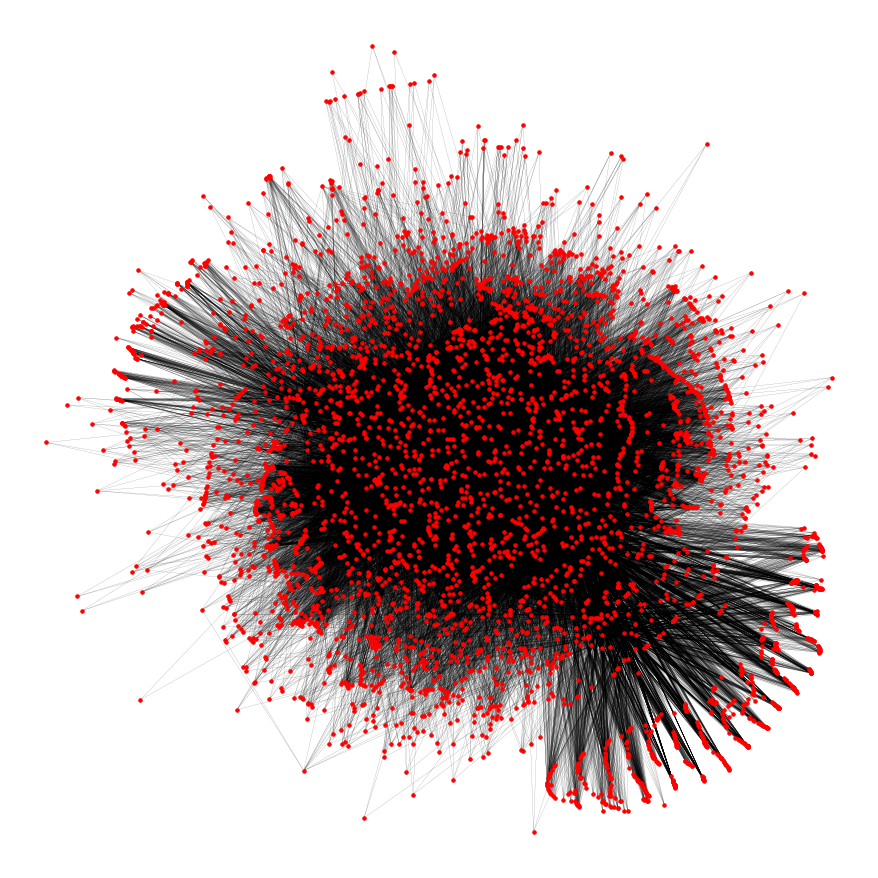

In [35]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov3 = df.loc[df['Day'] == 3]
#DELETE TWEETS WITHOUT RETWEET
df_Nov3 = df_Nov3[df_Nov3['Retweet'].notna()]
Start_length = str(len(df_Nov3))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov3 = df_Nov3.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov3, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov3_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov3_retweet_leaderboard = Nov3_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov3_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov3_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov3_retweet_leaderboard_filterbyconnections = Nov3_retweet_leaderboard[['Screen_name']]
#convert in list
Nov3_retweet_leaderboard_filterbyconnections = Nov3_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 3 CONNECTION
df_Nov3 = df_Nov3[df_Nov3['Screen_name'].isin(Nov3_retweet_leaderboard_filterbyconnections)]
Graph_building_3Nov = df_Nov3[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(3,figsize=(12,12)) 
G_3Nov = nx.Graph()
for r in Graph_building_3Nov.iterrows():
    for user in r[1]['Retweet']:
        G_3Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_3Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [36]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_3Nov))
density_G_3Nov = nx.density(G_3Nov)
print("Network density", density_G_3Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_3Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_3Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_3Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 4350
Number of edges: 42112
Average degree:  19.3618
Network density 0.0044520209428511774
Nel grafo di Biden 1K del NOV vi sono 42112 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 63


Length of the dataset 10879
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  6498 non-null   object
 1   connessioni  6498 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.7+ KB
Info dataset None
Length of the filtered dataset 6498
Number of useres deleted 4381.0
Start run 23:18:57.887645
Finish script 23:20:43.524169


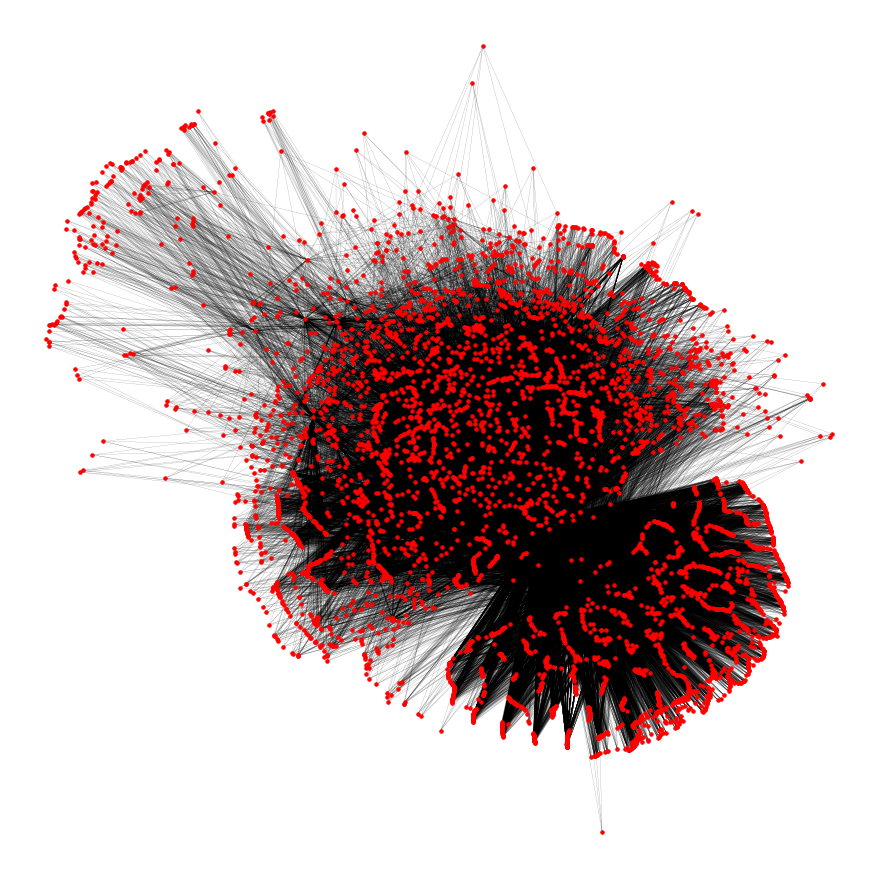

In [37]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov4 = df.loc[df['Day'] == 4]
#DELETE TWEETS WITHOUT RETWEET
df_Nov4 = df_Nov4[df_Nov4['Retweet'].notna()]
Start_length = str(len(df_Nov4))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov4 = df_Nov4.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov4, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov4_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov4_retweet_leaderboard = Nov4_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov4_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov4_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov4_retweet_leaderboard_filterbyconnections = Nov4_retweet_leaderboard[['Screen_name']]
#convert in list
Nov4_retweet_leaderboard_filterbyconnections = Nov4_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 4 CONNECTION
df_Nov4 = df_Nov4[df_Nov4['Screen_name'].isin(Nov4_retweet_leaderboard_filterbyconnections)]
Graph_building_4Nov = df_Nov4[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(4,figsize=(12,12)) 
G_4Nov = nx.Graph()
for r in Graph_building_4Nov.iterrows():
    for user in r[1]['Retweet']:
        G_4Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_4Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [38]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_4Nov))
density_G_4Nov = nx.density(G_4Nov)
print("Network density", density_G_4Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_4Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_4Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_4Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 5856
Number of edges: 59979
Average degree:  20.4846
Network density 0.0034986560456944462
Nel grafo di Biden 1K del NOV vi sono 59979 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 63


Length of the dataset 10712
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  6707 non-null   object
 1   connessioni  6707 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.9+ KB
Info dataset None
Length of the filtered dataset 6707
Number of useres deleted 4005.0
Start run 23:20:45.280715
Finish script 23:22:36.154934


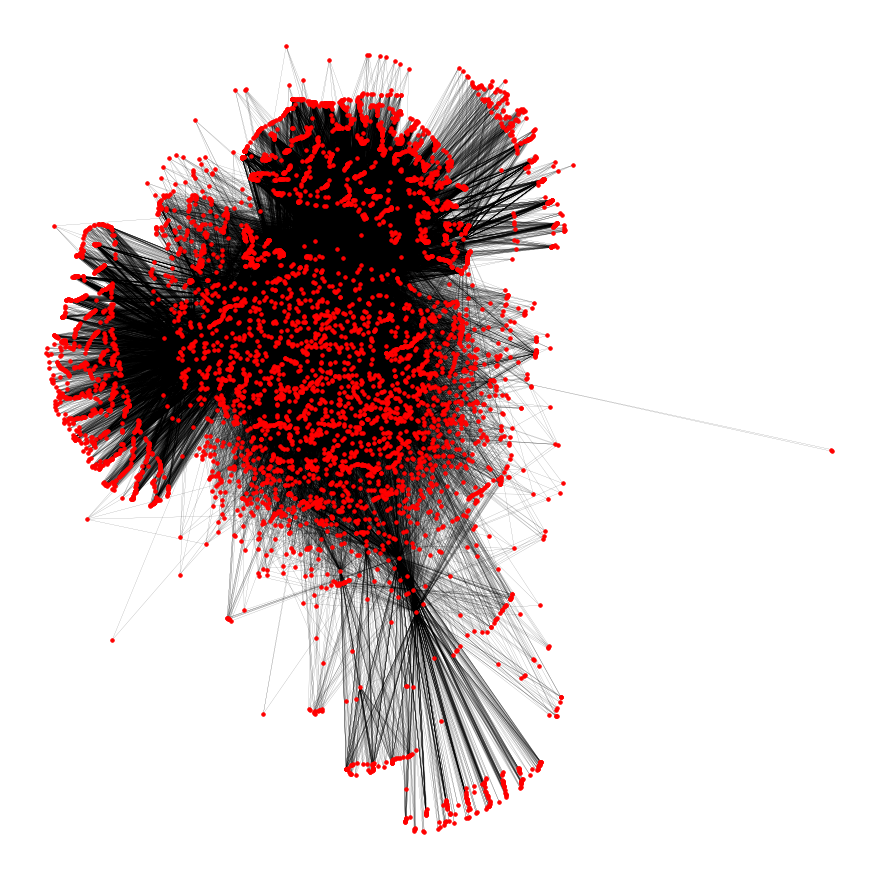

In [39]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov5 = df.loc[df['Day'] == 5]
#DELETE TWEETS WITHOUT RETWEET
df_Nov5 = df_Nov5[df_Nov5['Retweet'].notna()]
Start_length = str(len(df_Nov5))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov5 = df_Nov5.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov5, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov5_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov5_retweet_leaderboard = Nov5_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov5_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov5_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov5_retweet_leaderboard_filterbyconnections = Nov5_retweet_leaderboard[['Screen_name']]
#convert in list
Nov5_retweet_leaderboard_filterbyconnections = Nov5_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 5 CONNECTION
df_Nov5 = df_Nov5[df_Nov5['Screen_name'].isin(Nov5_retweet_leaderboard_filterbyconnections)]
Graph_building_5Nov = df_Nov5[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(5,figsize=(12,12)) 
G_5Nov = nx.Graph()
for r in Graph_building_5Nov.iterrows():
    for user in r[1]['Retweet']:
        G_5Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_5Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [40]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_5Nov))
density_G_5Nov = nx.density(G_5Nov)
print("Network density", density_G_5Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_5Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_5Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_5Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 6075
Number of edges: 57265
Average degree:  18.8527
Network density 0.0031038318895487884
Nel grafo di Biden 1K del NOV vi sono 57265 cliques
L'ordine del dominating set è: 64
L'ordine del dominating edge set è: 64


Length of the dataset 6790
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  4719 non-null   object
 1   connessioni  4719 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 73.9+ KB
Info dataset None
Length of the filtered dataset 4719
Number of useres deleted 2071.0
Start run 23:22:37.871332
Finish script 23:23:30.719960


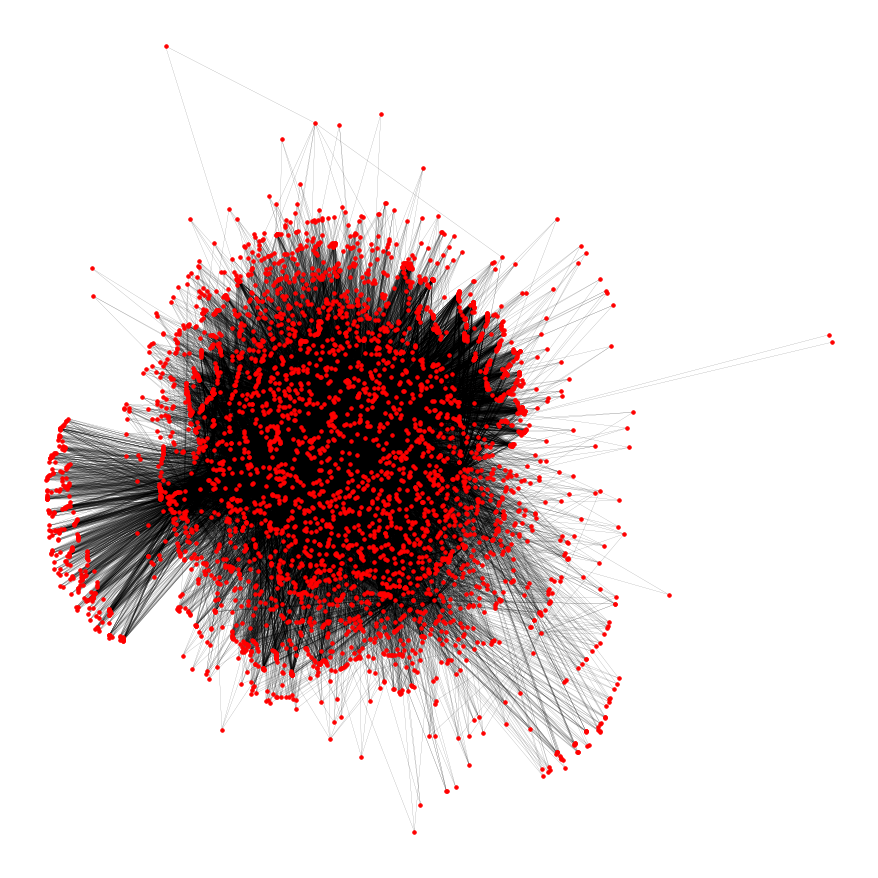

In [41]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov6 = df.loc[df['Day'] == 6]
#DELETE TWEETS WITHOUT RETWEET
df_Nov6 = df_Nov6[df_Nov6['Retweet'].notna()]
Start_length = str(len(df_Nov6))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov6 = df_Nov6.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov6, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov6_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov6_retweet_leaderboard = Nov6_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov6_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov6_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov6_retweet_leaderboard_filterbyconnections = Nov6_retweet_leaderboard[['Screen_name']]
#convert in list
Nov6_retweet_leaderboard_filterbyconnections = Nov6_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 6 CONNECTION
df_Nov6 = df_Nov6[df_Nov6['Screen_name'].isin(Nov6_retweet_leaderboard_filterbyconnections)]
Graph_building_6Nov = df_Nov6[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(6,figsize=(12,12)) 
G_6Nov = nx.Graph()
for r in Graph_building_6Nov.iterrows():
    for user in r[1]['Retweet']:
        G_6Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_6Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [42]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_6Nov))
density_G_6Nov = nx.density(G_6Nov)
print("Network density", density_G_6Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_6Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_6Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_6Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 3988
Number of edges: 36526
Average degree:  18.3180
Network density 0.004594420331473477
Nel grafo di Biden 1K del NOV vi sono 36526 cliques
L'ordine del dominating set è: 64
L'ordine del dominating edge set è: 64


Length of the dataset 27742
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15138 entries, 0 to 15137
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  15138 non-null  object
 1   connessioni  15138 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 236.7+ KB
Info dataset None
Length of the filtered dataset 15138
Number of useres deleted 12604.0
Start run 23:23:32.274219
Finish script 23:31:43.670601


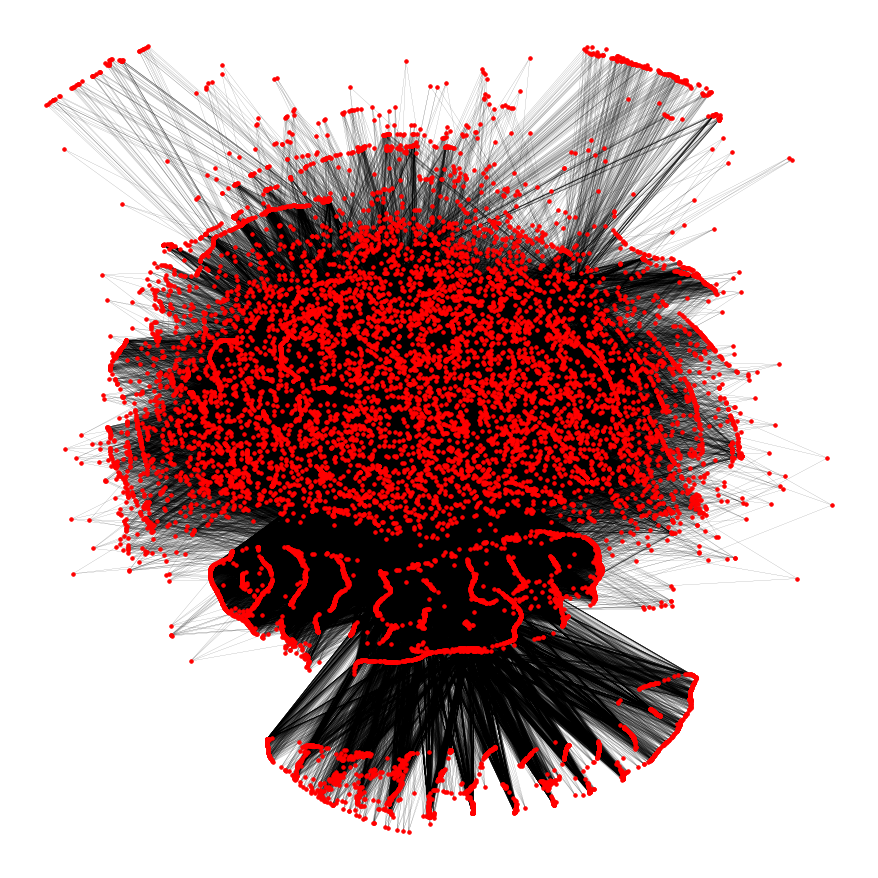

In [43]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov7 = df.loc[df['Day'] == 7]
#DELETE TWEETS WITHOUT RETWEET
df_Nov7 = df_Nov7[df_Nov7['Retweet'].notna()]
Start_length = str(len(df_Nov7))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov7 = df_Nov7.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov7, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov7_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov7_retweet_leaderboard = Nov7_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov7_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov7_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov7_retweet_leaderboard_filterbyconnections = Nov7_retweet_leaderboard[['Screen_name']]
#convert in list
Nov7_retweet_leaderboard_filterbyconnections = Nov7_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 7 CONNECTION
df_Nov7 = df_Nov7[df_Nov7['Screen_name'].isin(Nov7_retweet_leaderboard_filterbyconnections)]
Graph_building_7Nov = df_Nov7[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(7,figsize=(12,12)) 
G_7Nov = nx.Graph()
for r in Graph_building_7Nov.iterrows():
    for user in r[1]['Retweet']:
        G_7Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_7Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [44]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_7Nov))
density_G_7Nov = nx.density(G_7Nov)
print("Network density", density_G_7Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_7Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_7Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_7Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 13529
Number of edges: 126489
Average degree:  18.6989
Network density 0.0013822400215337848
Nel grafo di Biden 1K del NOV vi sono 126489 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 63


Length of the dataset 7644
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  5544 non-null   object
 1   connessioni  5544 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.8+ KB
Info dataset None
Length of the filtered dataset 5544
Number of useres deleted 2100.0
Start run 23:31:47.843285
Finish script 23:33:11.511372


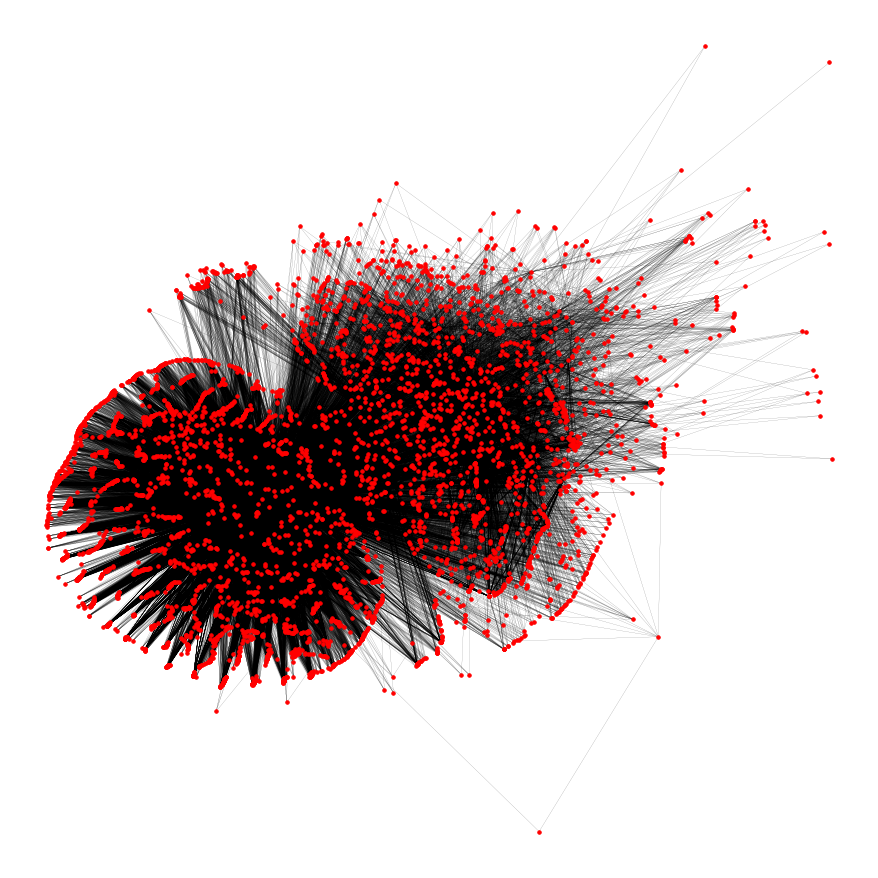

In [45]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov8 = df.loc[df['Day'] == 8]
#DELETE TWEETS WITHOUT RETWEET
df_Nov8 = df_Nov8[df_Nov8['Retweet'].notna()]
Start_length = str(len(df_Nov8))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov8 = df_Nov8.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
networkx_TEST = nx.from_pandas_edgelist(df_Nov8, 'Screen_name', 'Retweet')
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov8_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov8_retweet_leaderboard = Nov8_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov8_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov8_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov8_retweet_leaderboard_filterbyconnections = Nov8_retweet_leaderboard[['Screen_name']]
#convert in list
Nov8_retweet_leaderboard_filterbyconnections = Nov8_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 8 CONNECTION
df_Nov8 = df_Nov8[df_Nov8['Screen_name'].isin(Nov8_retweet_leaderboard_filterbyconnections)]
Graph_building_8Nov = df_Nov8[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(8,figsize=(12,12)) 
G_8Nov = nx.Graph()
for r in Graph_building_8Nov.iterrows():
    for user in r[1]['Retweet']:
        G_8Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_8Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [46]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_8Nov))
density_G_8Nov = nx.density(G_8Nov)
print("Network density", density_G_8Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_8Nov), "cliques") 
dominating_set = min_weighted_dominating_set(G_8Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_8Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 5063
Number of edges: 51925
Average degree:  20.5116
Network density 0.004052065273484557
Nel grafo di Biden 1K del NOV vi sono 51925 cliques
L'ordine del dominating set è: 63
L'ordine del dominating edge set è: 63


Length of the dataset 3936
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screen_name  5544 non-null   object
 1   connessioni  5544 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.8+ KB
Info dataset None
Length of the filtered dataset 5544
Number of useres deleted -1608.0
Start run 23:33:13.190511
Finish script 23:33:18.038998


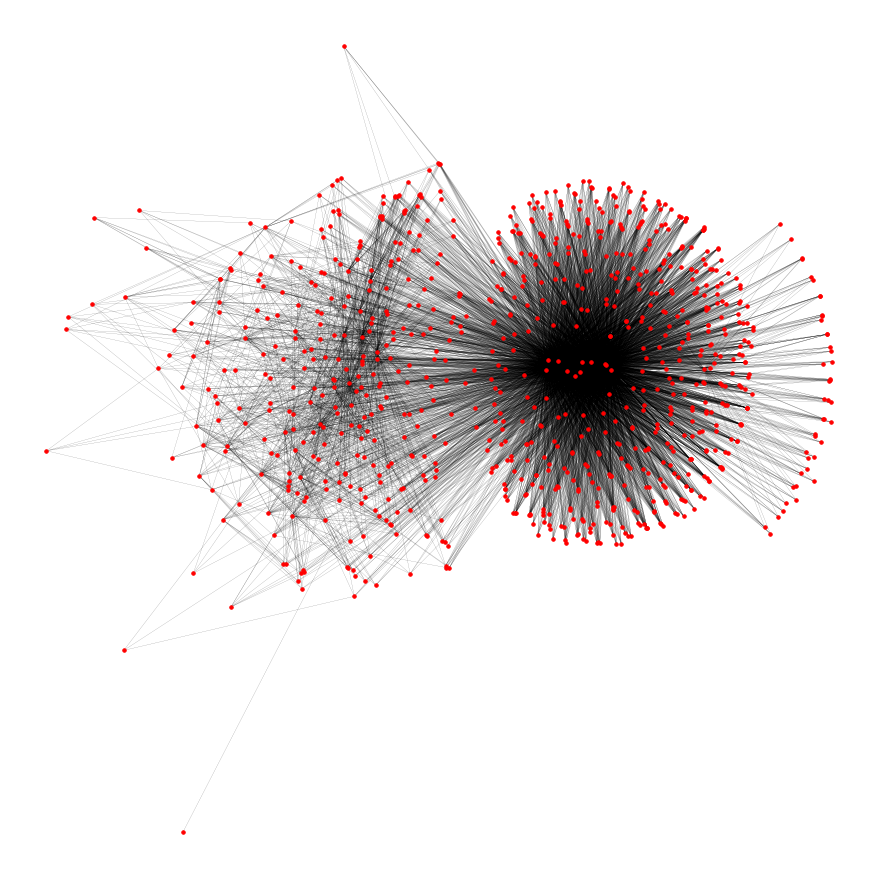

In [47]:
#-------------
#PIPELINE TO BUILD A GRAPH
#SET THE DAY TAKE INTO CONSIDERATION
df_Nov9 = df.loc[df['Day'] == 9]
#DELETE TWEETS WITHOUT RETWEET
df_Nov9 = df_Nov9[df_Nov9['Retweet'].notna()]
Start_length = str(len(df_Nov9))
print('Length of the dataset ' + Start_length)
#RESET INDEX
df_Nov9 = df_Nov9.reset_index(drop = True)
#Per capire quali sono gli utenti che hanno maggiori relazioni, per i retweet:
leaderboard = {}
for x in networkx_TEST.nodes:
 leaderboard[x] = len(networkx_TEST[x])
s_biden_retweet = pd.Series(leaderboard, name='connections')
Nov9_retweet_leaderboard = s_biden_retweet.to_frame().sort_values('connections', ascending=False)
Nov9_retweet_leaderboard = Nov9_retweet_leaderboard.reset_index().rename(columns={"index": "Screen_name", "connections": "connessioni"})
print("Info dataset " + str(Nov9_retweet_leaderboard.info()))
#SELECT PEOPLE WITH AT LEAST TWO CONNECTION (THE AIM IS TO IDENITFY THIS SCREEN_NAME IN THE ORIGINAL DATASET
# AND FILTER IT)
Filtereddataset_length = str(len(Nov9_retweet_leaderboard))
print("Length of the filtered dataset " + Filtereddataset_length)
print("Number of useres deleted " + str(float(Start_length) - float(Filtereddataset_length)))
Nov9_retweet_leaderboard_filterbyconnections = Nov9_retweet_leaderboard[['Screen_name']]
#convert in list
Nov9_retweet_leaderboard_filterbyconnections = Nov9_retweet_leaderboard_filterbyconnections['Screen_name'].tolist()
#FILTERED DATASET FOR USERS WITH MORE THAN 9 CONNECTION
df_Nov9 = df_Nov9[df_Nov9['Screen_name'].isin(Nov9_retweet_leaderboard_filterbyconnections)]
Graph_building_9Nov = df_Nov9[['Screen_name', 'Retweet']]
#GRAPH BUILDING 1st NOV
print("Start run " + str(datetime.now().time()))
plt.figure(9,figsize=(12,12)) 
G_9Nov = nx.Graph()
for r in Graph_building_9Nov.iterrows():
    for user in r[1]['Retweet']:
        G_9Nov.add_edge(r[1]['Screen_name'], user)
nx.draw(G_9Nov, with_labels=False, node_size = 12, node_color = 'Red', width = 0.1)

print("Finish script " + str(datetime.now().time()))

In [48]:
#VADO AD OTTENERE LE INFORMAZIONI SUL GRAFO:
print("Info graph")
print(nx.info(G_9Nov))
density_G_9Nov = nx.density(G_9Nov)
print("Network density", density_G_9Nov)
print("Nel grafo di Biden 1K del NOV vi sono", nx.graph_number_of_cliques(G_9Nov), "cliques")
dominating_set = min_weighted_dominating_set(G_9Nov)
print("L'ordine del dominating set è:", len(dominating_set))
edge_dominating_set = min_edge_dominating_set(G_9Nov)
print("L'ordine del dominating edge set è:", len(edge_dominating_set))

Info graph
Name: 
Type: Graph
Number of nodes: 912
Number of edges: 8969
Average degree:  19.6689
Network density 0.021590405761935026
Nel grafo di Biden 1K del NOV vi sono 8969 cliques
L'ordine del dominating set è: 61
L'ordine del dominating edge set è: 61
